<a href="https://colab.research.google.com/github/zhuanxuhit/cs20si/blob/master/lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 线性模型
分两步走：
1. 定义模型
2. 计算

In [1]:
!git clone https://github.com/chiphuyen/stanford-tensorflow-tutorials.git tutorials

Cloning into 'tutorials'...
remote: Enumerating objects: 635, done.
remote: Total 635 (delta 0), reused 0 (delta 0), pack-reused 635
Receiving objects: 100% (635/635), 13.71 MiB | 20.37 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [2]:
!ls  tutorials

2017  assignments  examples  LICENSE  README.md  setup


In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# import utils

In [0]:
DATA_FILE = 'tutorials/examples/data/birth_life_2010.txt'

In [0]:
import tutorials.examples.utils as utils

In [0]:
# Step 1: read in the data
data, n_samples = utils.read_birth_life_data(DATA_FILE)

看下data数据的结构

In [10]:
data[0]

array([ 1.822  , 74.82825], dtype=float32)

In [0]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X, Y = tf.placeholder(tf.float32, name="X",shape=[]), tf.placeholder(tf.float32, name="Y")

In [0]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
w, b = tf.get_variable(name="w", dtype=tf.float32, initializer=tf.constant(0.0)), tf.get_variable(name="b", dtype=tf.float32, initializer=tf.constant(0.0))

In [0]:
# Step 4: build model to predict Y
Y_predicted = w * X + b 

In [0]:
# Step 5: use the squared error as the loss function
# you can use either mean squared error or Huber loss
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

In [0]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)


In [20]:
start = time.time()
writer = tf.summary.FileWriter('./graphs/linear_reg', tf.get_default_graph())
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	# Step 8: train the model for 100 epochs
	for i in range(100): 
		total_loss = 0
		for x, y in data:
			# Session execute optimizer and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w_out, b_out = sess.run([w, b]) 
  
print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.8637834631543
Epoch 1: 956.3224148609137
Epoch 2: 844.6737023980994
Epoch 3: 750.7312486011339
Epoch 4: 667.6598341012079
Epoch 5: 594.1417715627896
Epoch 6: 529.07878103068
Epoch 7: 471.5004191489204
Epoch 8: 420.5458626462441
Epoch 9: 375.45530721966765
Epoch 10: 335.5543025185697
Epoch 11: 300.24629857978107
Epoch 12: 269.00376475843336
Epoch 13: 241.35957466852116
Epoch 14: 216.90039135300015
Epoch 15: 195.25972298129324
Epoch 16: 176.1137693605349
Epoch 17: 159.17551693441837
Epoch 18: 144.1907111125557
Epoch 19: 130.93503488078713
Epoch 20: 119.20935661137888
Epoch 21: 108.8379309807855
Epoch 22: 99.66466760624593
Epoch 23: 91.55177013029001
Epoch 24: 84.37664046781751
Epoch 25: 78.03217824997724
Epoch 26: 72.42182927812989
Epoch 27: 67.46136239485718
Epoch 28: 63.07566952367442
Epoch 29: 59.19874146522856
Epoch 30: 55.77168446383194
Epoch 31: 52.74269822355127
Epoch 32: 50.065632780875376
Epoch 33: 47.70006421631674
Epoch 34: 45.61017902122909
Epoch 35: 43.76379750

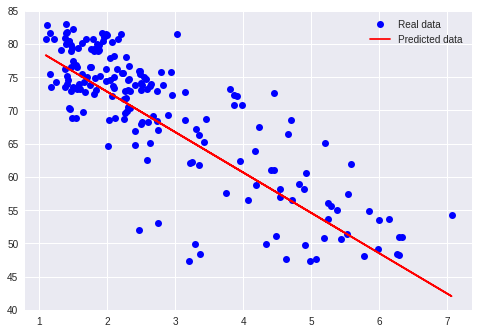

In [21]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()